# **THE SPARKS FOUNDATION INTERNSHIP (GRIP FEB 2021)**
# **Author:** Jatin Ahuja
# **Task 2:** Prediction using Unsupervised ML
## **Problem Statement:** From the given ‘Iris’ dataset, 
## predict the optimum number of clusters and represent it visually.

## **2.1 Importing Libraries**

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.cluster import KMeans
from sklearn import datasets

## **2.2 Reading The Data And Data Preprocessing**

In [47]:
df = datasets.load_iris()
iris_df = pd.DataFrame(df.data, columns= df.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [48]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, init ='k-means++',random_state = 0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)

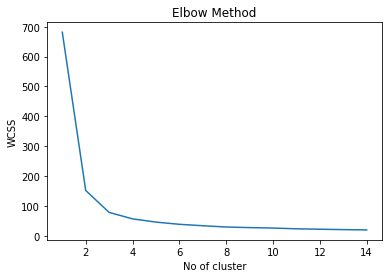

In [49]:
plt.plot(range(1, 15), wcss)
plt.title("Elbow Method", fontsize = 12)
plt.xlabel("No of cluster")
plt.ylabel("WCSS")
plt.show()

From the above elbow method,we have chosen the number of clusters as **3**.

In [50]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(iris_df)

## **2.3 Cluster Visualization**

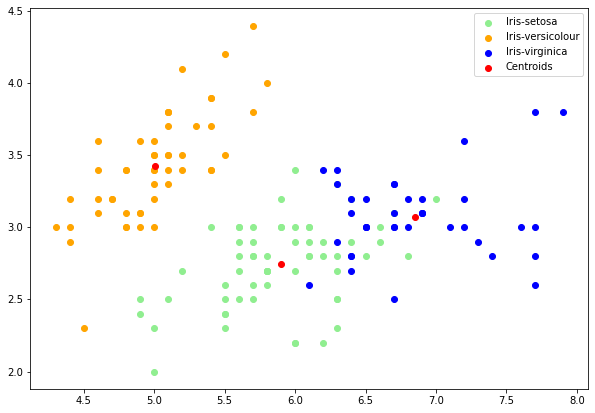

In [51]:
# Visualising the clusters (first two columns)
plt.figure(figsize=(10,7))
plt.scatter(df["data"][y_kmeans == 0, 0], df["data"][y_kmeans == 0, 1], 
            c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(df["data"][y_kmeans == 1, 0], df["data"][y_kmeans == 1, 1], 
            c = 'orange', label = 'Iris-versicolour')
plt.scatter(df["data"][y_kmeans == 2, 0], df["data"][y_kmeans == 2, 1],
            c = 'blue', label = 'Iris-virginica')
# Visualizing the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            c = 'red', label = 'Centroids')
plt.legend();

In [52]:
iris_df["label"] = kmeans.labels_

In [53]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
23,5.1,3.3,1.7,0.5,1
44,5.1,3.8,1.9,0.4,1
81,5.5,2.4,3.7,1.0,0
100,6.3,3.3,6.0,2.5,2
11,4.8,3.4,1.6,0.2,1


In [54]:
iris_df["label"].value_counts()

0    62
1    50
2    38
Name: label, dtype: int64